# Salary Prediction by Region in Indonesia

Dataset:  
- [Indonesian Salary by Region (1997-2022)](https://www.kaggle.com/datasets/linkgish/indonesian-salary-by-region-19972022)
- [Daftar Lengkap UMP 2023 di 34 Provinsi Seluruh Indonesia](https://www.kompas.com/tren/read/2022/11/30/083000165/daftar-lengkap-ump-2023-di-34-provinsi-seluruh-indonesia)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import tensorflow as tf
from tensorflow.keras import layers

np.random.seed(42)
tf.random.set_seed(42)

## Load Dataset

In [ ]:
salary = pd.read_csv('/content/Indonesian Salary by Region (1997-2023).csv')
salary.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  878 non-null    object
 1   SALARY  878 non-null    int64 
 2   YEAR    878 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.7+ KB


In [ ]:
salary.describe()

,SALARY,YEAR
count,8.780000e+02,878.000000
mean,1.248270e+06,2010.335991
std,9.690375e+05,7.736384
min,1.060000e+05,1997.000000
25%,4.272250e+05,2004.000000
50%,9.250000e+05,2010.000000
75%,1.974836e+06,2017.000000
max,4.901798e+06,2023.000000


In [ ]:
salary.groupby('YEAR')['REGION'].nunique()

YEAR
1997    27
1998    31
1999    31
2000    31
2001    31
2002    31
2003    31
2004    31
2005    31
2006    33
2007    33
2008    33
2009    33
2010    33
2011    33
2012    33
2013    33
2014    33
2015    34
2016    34
2017    34
2018    34
2019    34
2020    34
2021    34
2022    34
2023    34
Name: REGION, dtype: int64

## Data Preprocessing

In [ ]:
salary = salary[salary['YEAR'] > 2014]
salary.head()

,REGION,SALARY,YEAR
572,ACEH,1900000,2015
573,SUMATERA UTARA,1625000,2015
574,SUMATERA BARAT,1615000,2015
575,RIAU,1878000,2015
576,JAMBI,1710000,2015


In [ ]:
salaries_by_region = salary.pivot(index='REGION', columns=['YEAR'])
salaries_by_region

SALARY                                               \
YEAR                     2015     2016     2017     2018     2019     2020   
REGION                                                                       
ACEH                  1900000  2118500  2500000  2700000  2916810  3165031   
BALI                  1621172  1807600  1956727  2127157  2297969  2494000   
BANTEN                1600000  1784000  1931180  2099385  2267990  2460997   
BENGKULU              1500000  1605000  1730000  1888741  2040407  2213604   
DI YOGYAKARTA          988500   988500  1337645  1454154  1570923  1704608   
DKI JAKARTA           2700000  3100000  3355750  3648036  3940973  4276350   
GORONTALO             1600000  1875000  2030000  2206813  2384020  2788826   
JAMBI                 1710000  1906650  2063000  2243719  2423889  2630162   
JAWA BARAT            1000000  2250000  1420624  1544361  1668373  1810351   
JAWA TENGAH            910000   910000  1367000  1486065  1605396  1742015   
JAWA TIMUR            1000000  1000000  1388000  1508895  1630059  1768777   
KALIMANTAN BARAT      1560000  1739400  1882900  2046900  2211500  2399699   
KALIMANTAN SELATAN    1870000  2085050  2258000  2454671  2651782  2877449   
KALIMANTAN TENGAH     1896367  2057558  2222986  2421305  2663435  2903145   
KALIMANTAN TIMUR      2026126  2161253   339556  2543332  2747561  2981379   
KALIMANTAN UTARA      2026126  2175340  2358800  2559903  2765463  3000804   
KEP. BANGKA BELITUNG  2100000  2341500  2534673  2755444  2976706  3230024   
KEP. RIAU             1954000  2178710  2358454  2563875  2769754  3005460   
LAMPUNG               1581000  1763000  1908447  2074673  2241270  2432002   
MALUKU                1650000  1775000  1925000  2222220  2400664  2604961   
MALUKU UTARA          1577617  1681266  1975000  2320803  2508091  2721530   
NUSA TENGGARA BARAT   1330000  1482950  1631245  1825000  2012610  2183883   
NUSA TENGGARA TIMUR   1250000  1425000  1650000  1660000  1795000  1950000   
PAPUA                 2193000  2435000  2663646  3000000  3240900  3516700   
PAPUA BARAT           2015000  2237000  2416855  2667000  2934500  3134600   
RIAU                  1878000  2095000  2266722  2464154  2662026  2888564   
SULAWESI BARAT        1655500  1864000  2017780  2193530  2381000  2678863   
SULAWESI SELATAN      2000000  2250000  2500000  2647767  2860382  3103800   
SULAWESI TENGAH       1500000  1670000  1807775  1965232  2123040  2303711   
SULAWESI TENGGARA     1652000  1850000  2002625  2177052  2351870  2552015   
SULAWESI UTARA        2150000  2400000  2598000  2824286  3051076  3310723   
SUMATERA BARAT        1615000  1800725  1949284  2119067  2289220  2484041   
SUMATERA SELATAN      1974346  2206000  2388000  2595995  2804453  3043111   
SUMATERA UTARA        1625000  1811875  1961354  2132189  2303403  2499423   

                                                 
YEAR                     2021     2022     2023  
REGION                                           
ACEH                  3165031  3166460  3413666  
BALI                  2494000  2516971  2713672  
BANTEN                2460996  2501203  2661280  
BENGKULU              2888564  2238094  2418280  
DI YOGYAKARTA         1765000  1840951  1981782  
DKI JAKARTA           4416186  4452724  4901798  
GORONTALO             2788826  2800580  2989350  
JAMBI                 3230023  2649034  2943000  
JAWA BARAT            1810351  1841487  1986670  
JAWA TENGAH           1798979  1813011  1958169  
JAWA TIMUR            1868777  1891567  2040244  
KALIMANTAN BARAT      2399698  2434328  2608602  
KALIMANTAN SELATAN    2877448  2906473  3149977  
KALIMANTAN TENGAH     2903144  2922516  3181013  
KALIMANTAN TIMUR      2981378  3014497  3201396  
KALIMANTAN UTARA      3000804  3016738  3251703  
KEP. BANGKA BELITUNG  2215000  3264881  3498479  
KEP. RIAU             2630162  3050172  3279194  
LAMPUNG               2432001  2440486  2633284  
MALUKU                2721530  26193

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

window_size, batch_size, shuffle_buffer = 3, 1, 10

models = {}
histories = {}

#### Create Windowed Dataset

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

#### Build LSTM Model

In [ ]:
def build_model():
    model = tf.keras.models.Sequential([
        layers.LSTM(50, input_shape=[None, 1], return_sequences=True),
        layers.LSTM(50),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mae', optimizer=optimizer)

    return model

#### Do Forecast

In [ ]:
def forecast(series, scaled_series, window_size, future_steps, model):
    initial_window = scaled_series[-window_size:]
    future_series = []

    for _ in range(future_steps):
        current_window = np.array(initial_window).reshape(1, -1)
        prediction = model.predict(current_window, verbose=0)
        future_series.append(prediction[0, 0])

        initial_window = np.roll(initial_window, -1)
        initial_window[-1] = prediction[0, 0]

    future_series = scaler.inverse_transform(np.array(future_series).reshape(-1, 1))
    combined_series = np.concatenate([series, future_series.flatten()])

    return combined_series

#### Plot Loss and Forecast

In [ ]:
def plot_results(history, series, region):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    axs[0].plot(history.epoch, history.history['loss'])
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('MAE')
    axs[0].set_title('Training Loss')

    axs[1].plot(range(2015, 2015 + len(series)), series)
    axs[1].set_xticks(range(2015, 2015 + len(series), 2))
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('Salary')
    axs[1].set_title(region + ' Salary Forecast')

## Forecast by Region

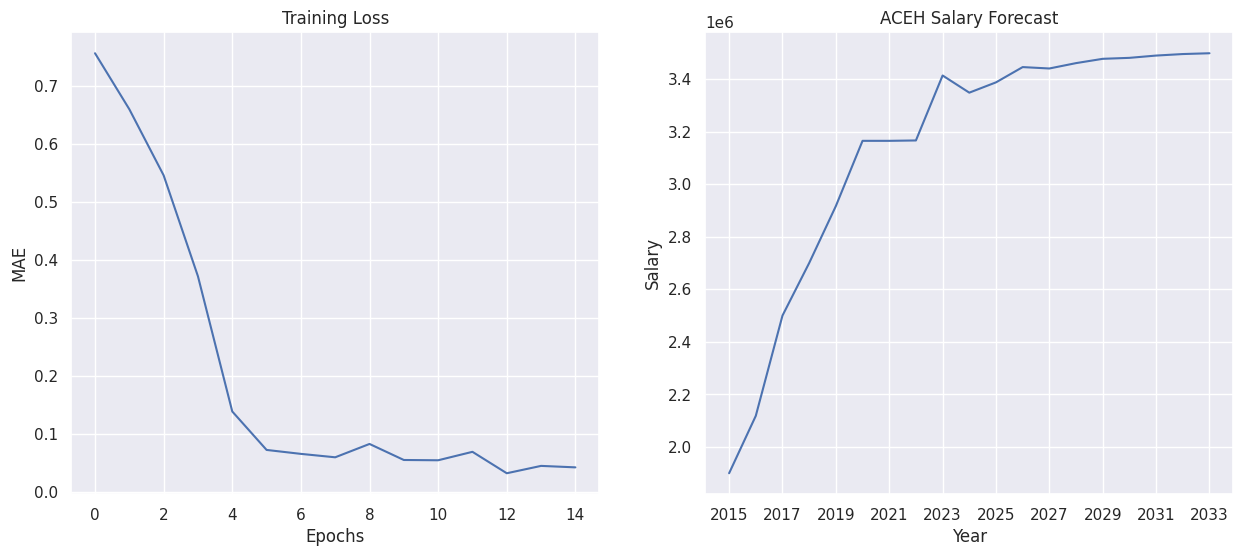

In [ ]:
region = 'ACEH'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

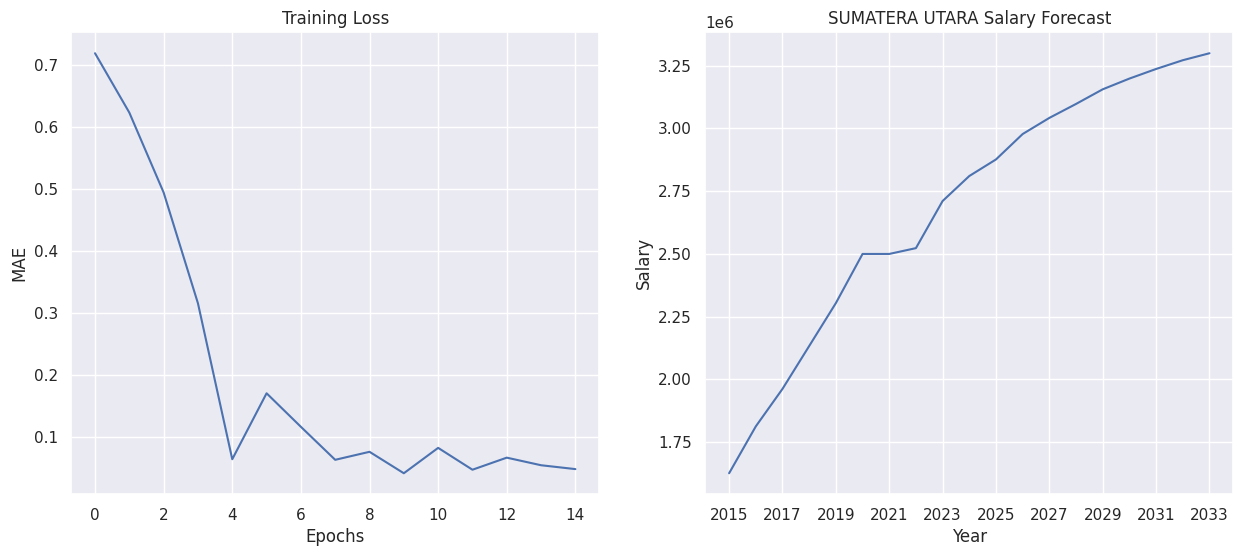

In [ ]:
region = 'SUMATERA UTARA'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

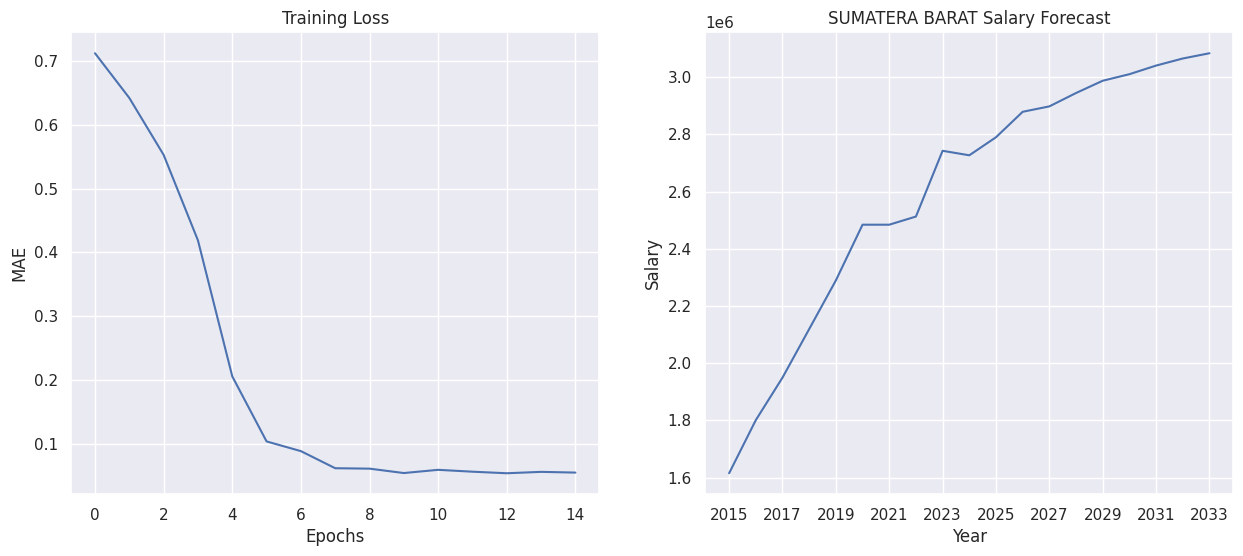

In [ ]:
region = 'SUMATERA BARAT'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

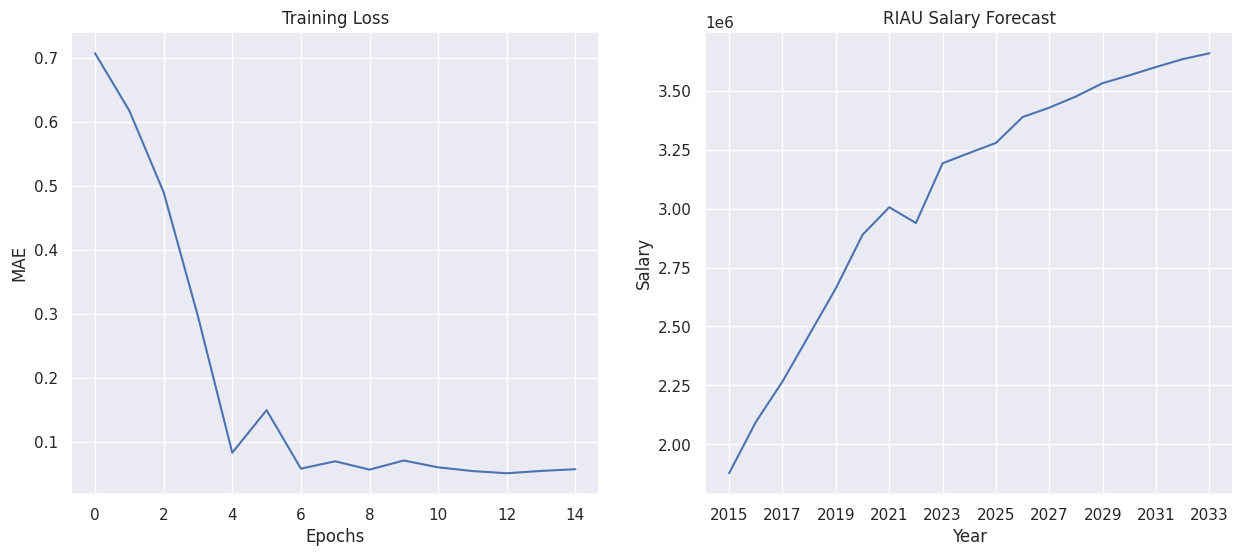

In [ ]:
region = 'RIAU'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

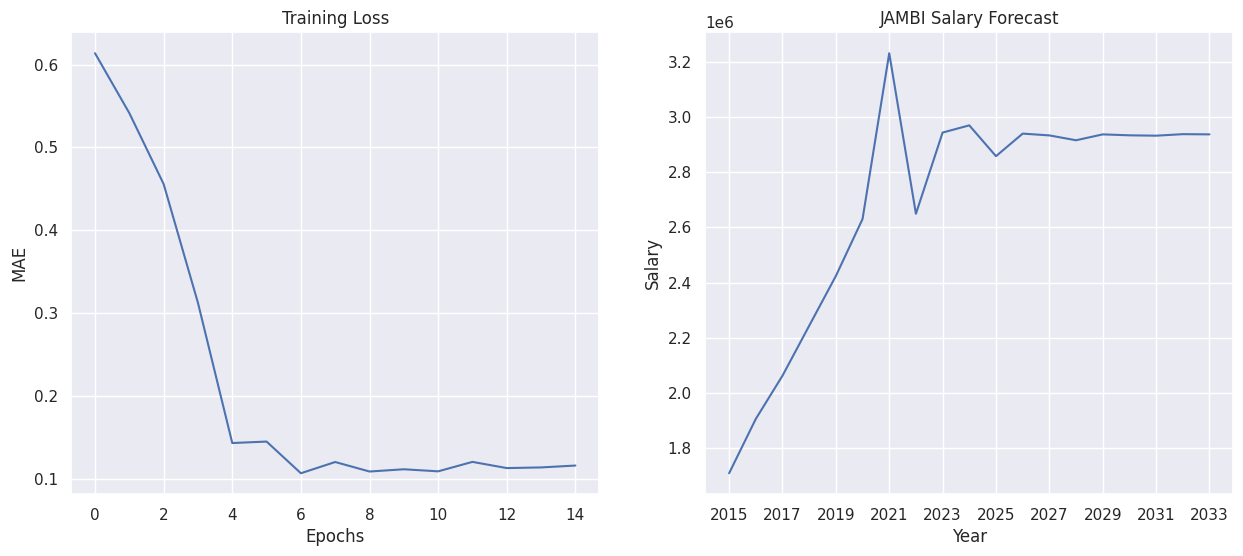

In [ ]:
region = 'JAMBI'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

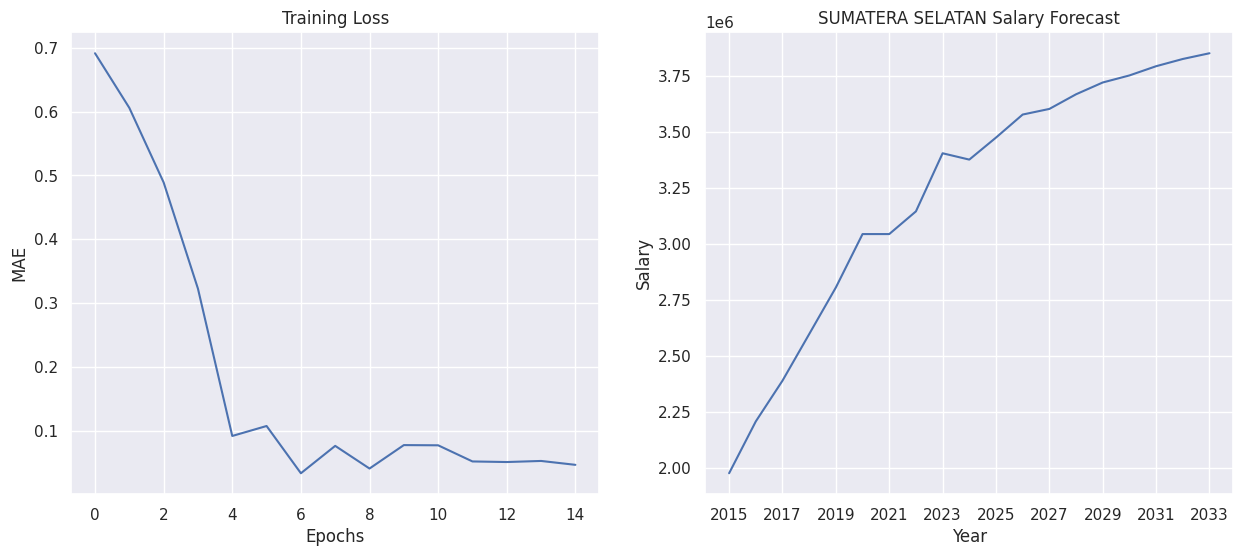

In [ ]:
region = 'SUMATERA SELATAN'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

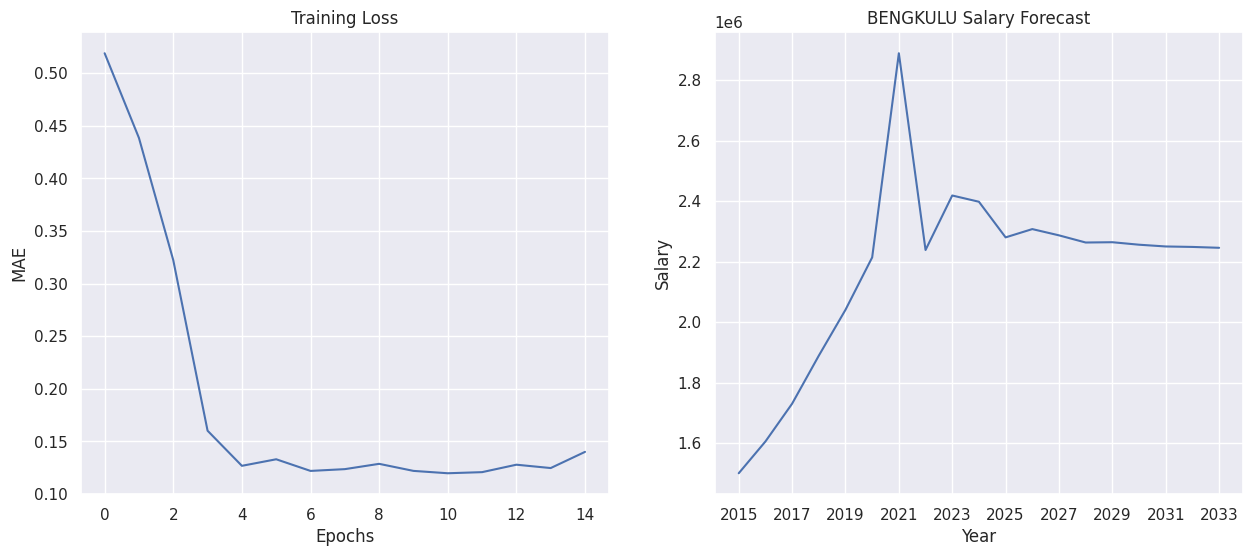

In [ ]:
region = 'BENGKULU'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

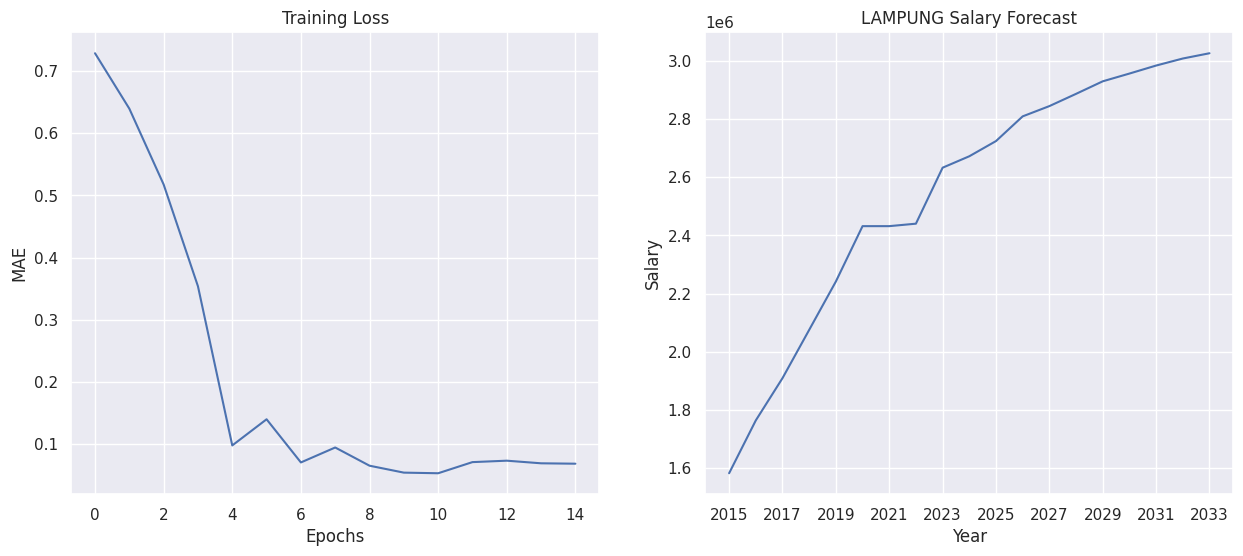

In [ ]:
region = 'LAMPUNG'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

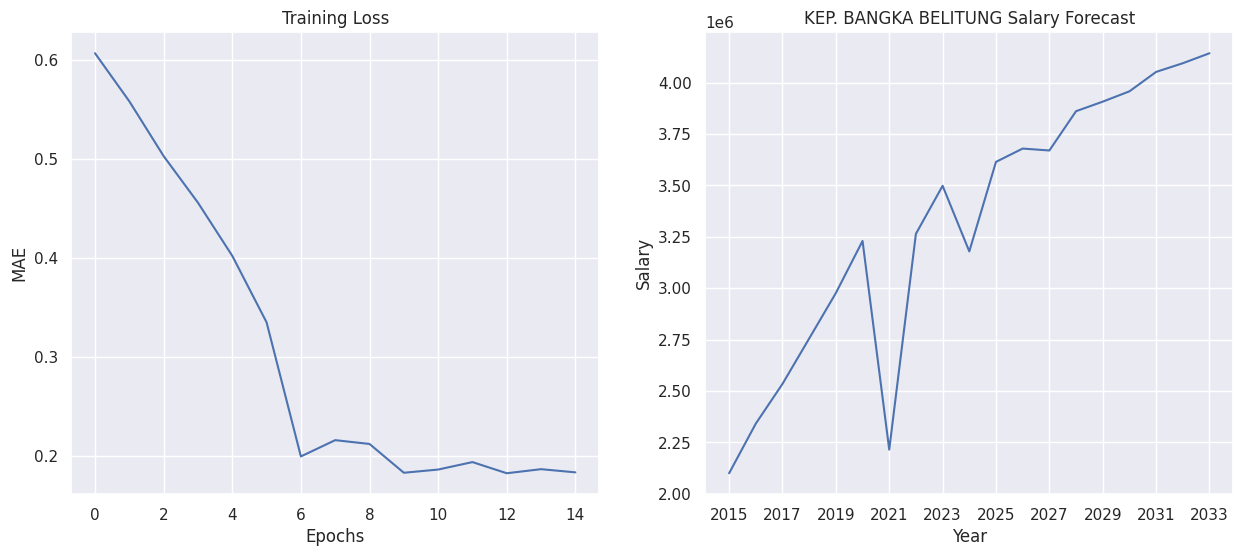

In [ ]:
region = 'KEP. BANGKA BELITUNG'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

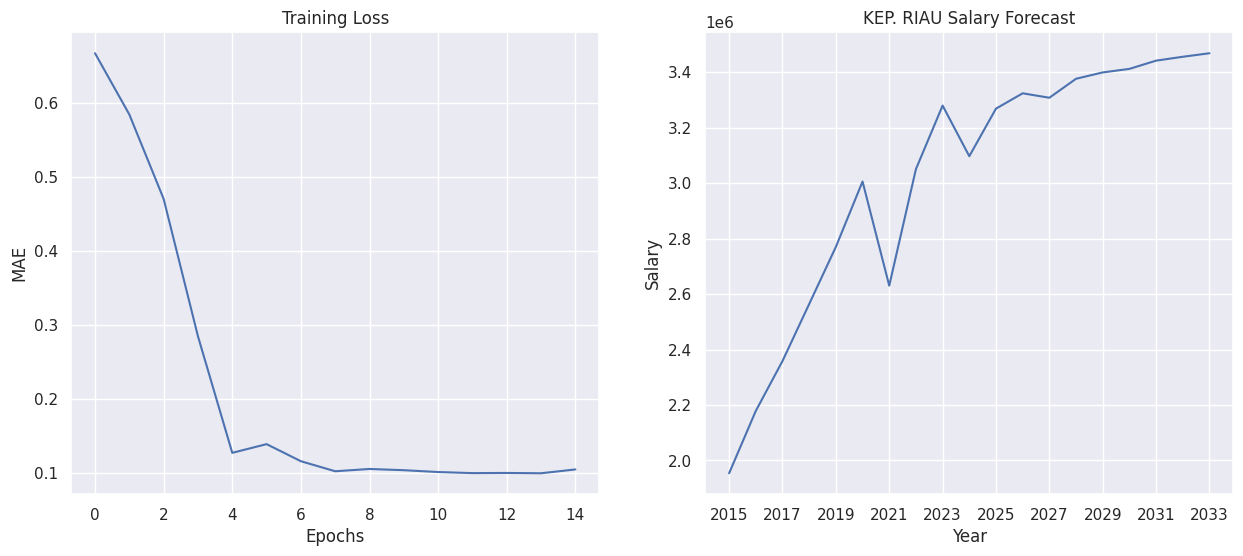

In [ ]:
region = 'KEP. RIAU'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

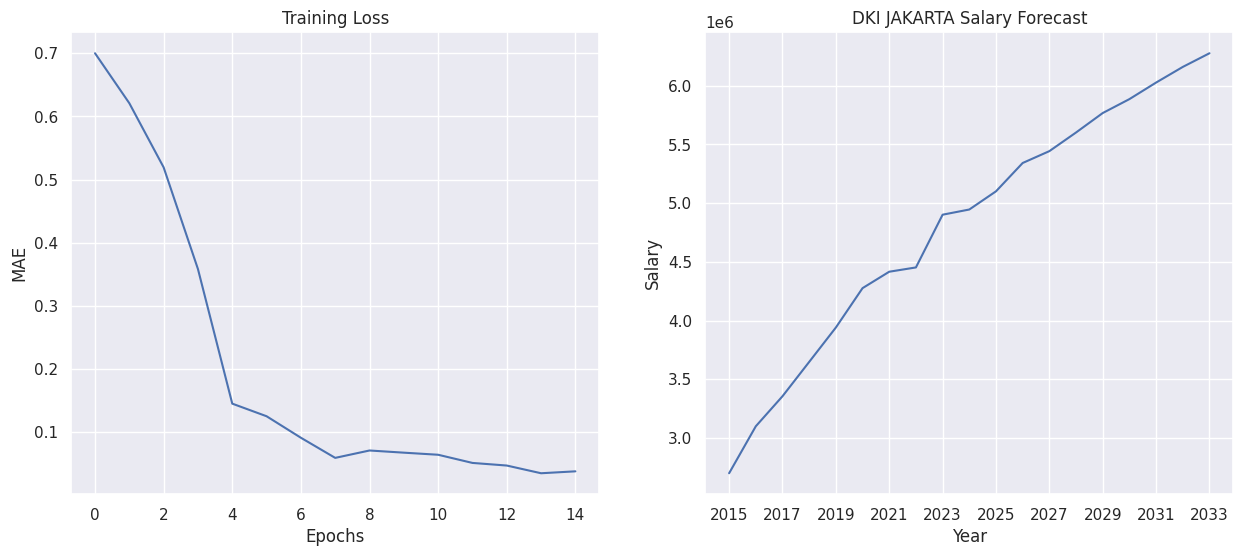

In [ ]:
region = 'DKI JAKARTA'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

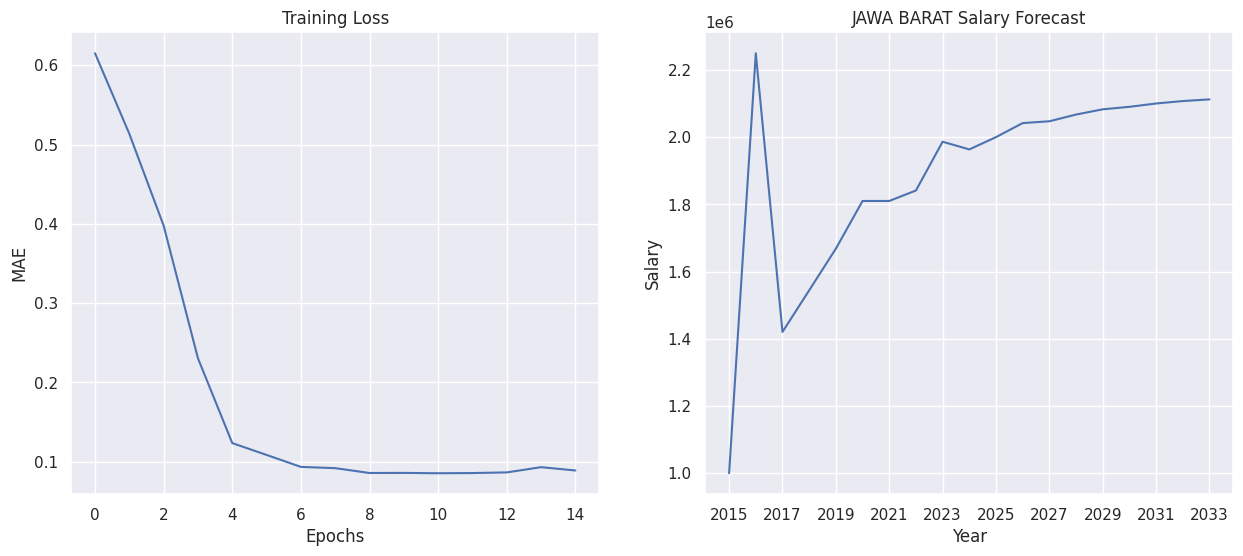

In [ ]:
region = 'JAWA BARAT'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

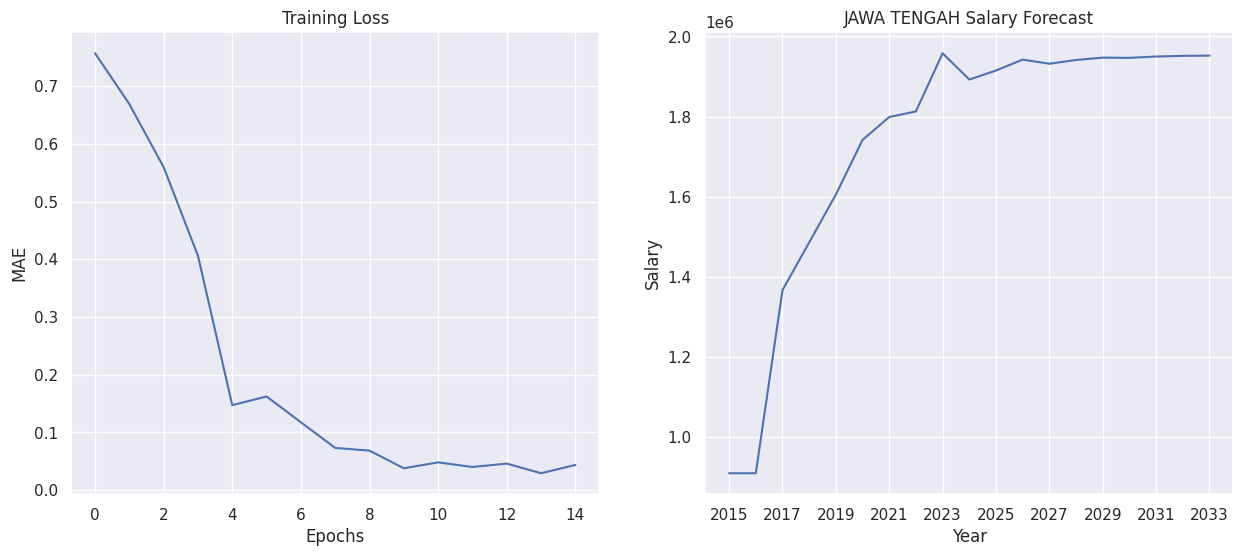

In [ ]:
region = 'JAWA TENGAH'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

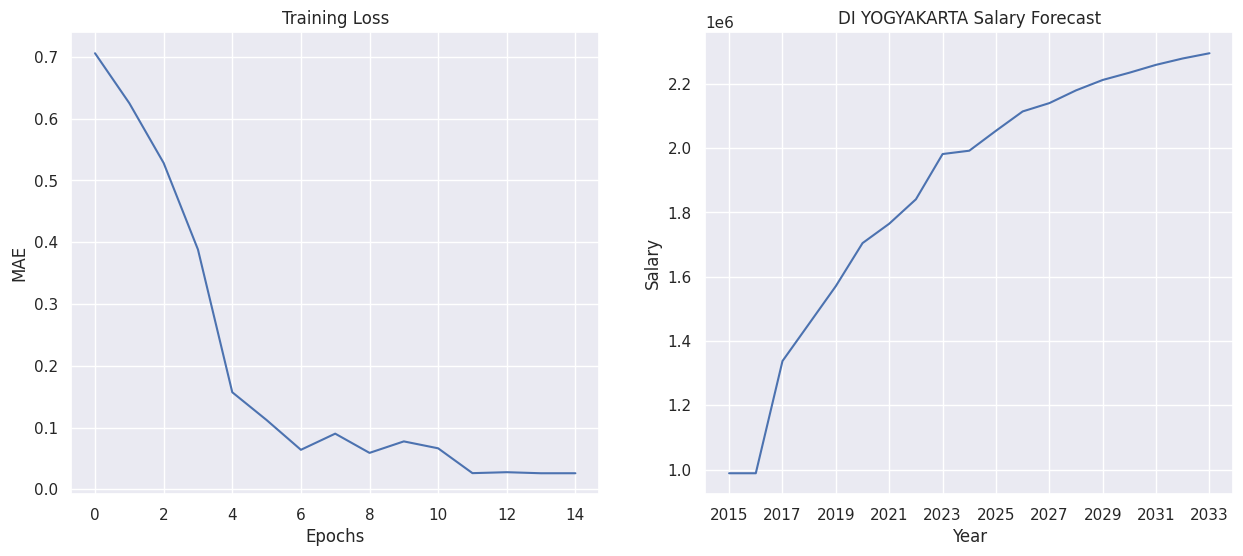

In [ ]:
region = 'DI YOGYAKARTA'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

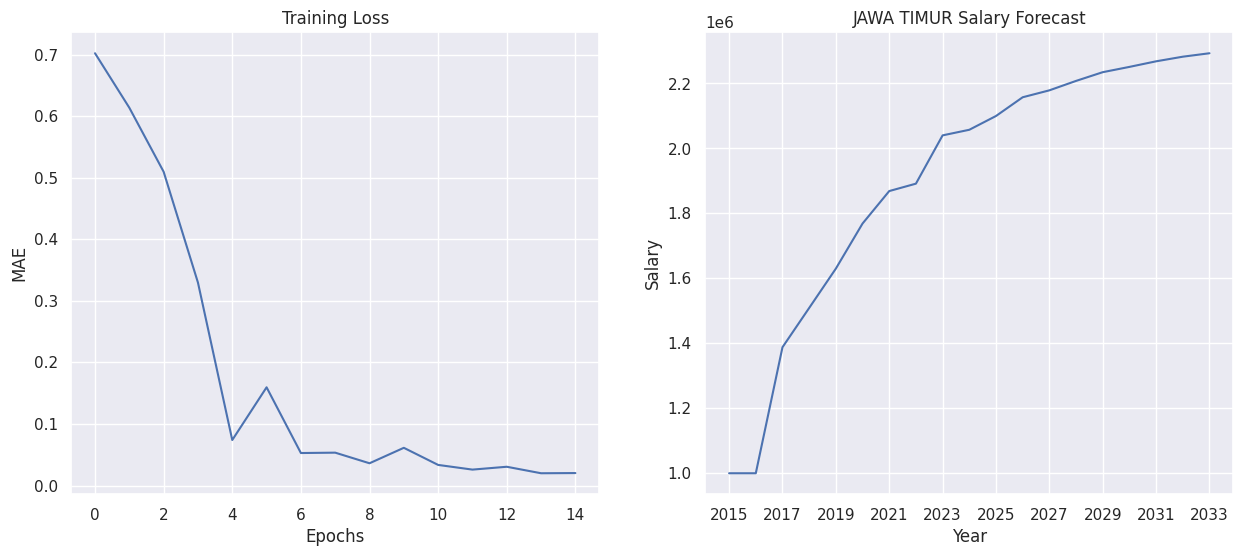

In [ ]:
region = 'JAWA TIMUR'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

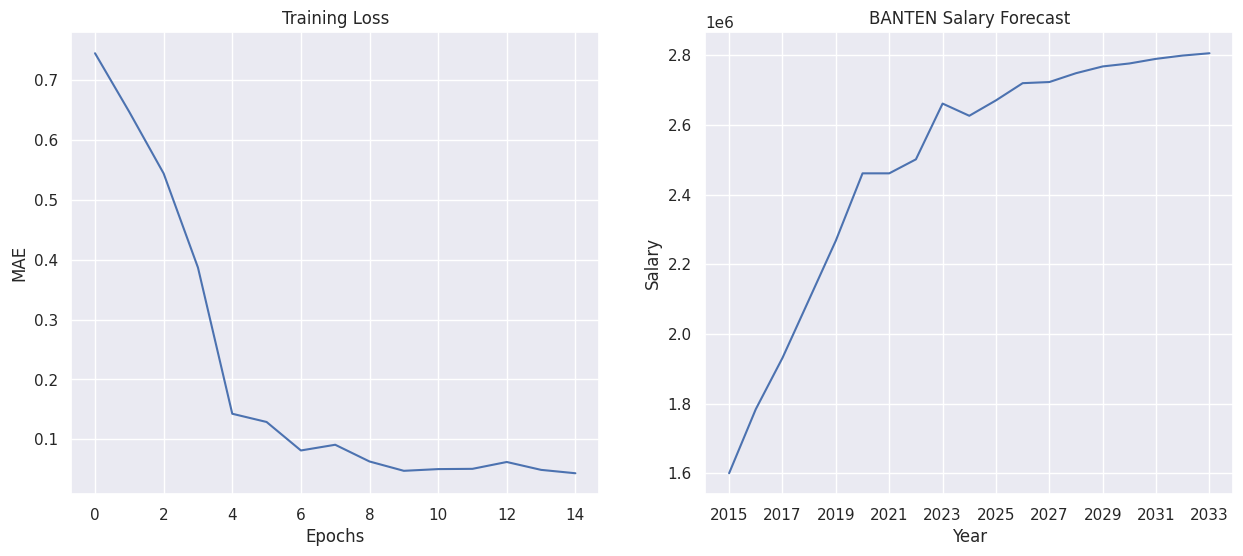

In [ ]:
region = 'BANTEN'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

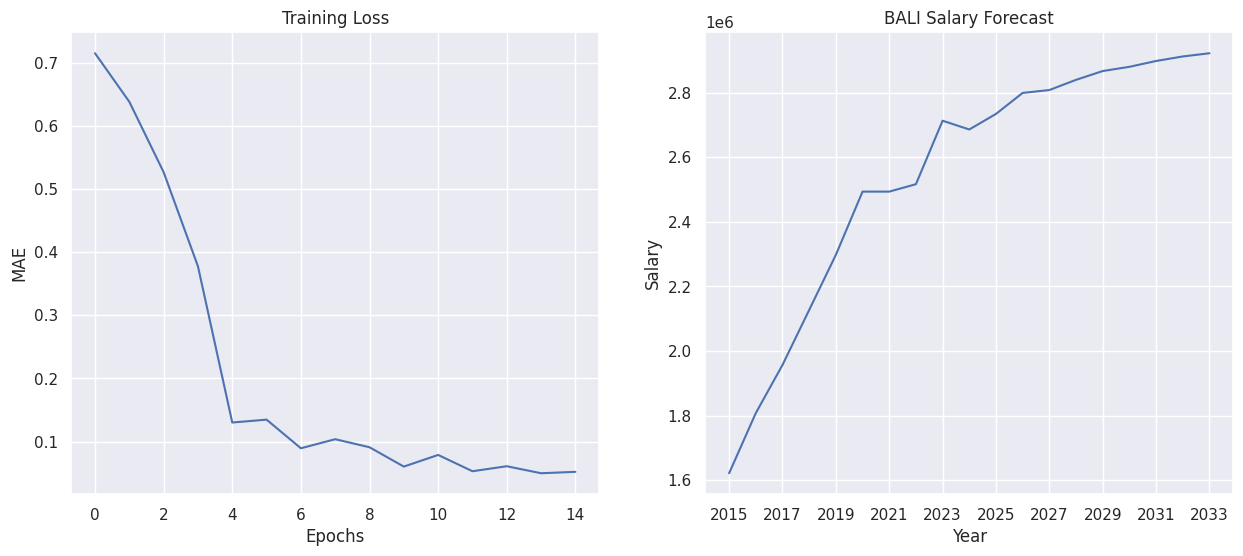

In [ ]:
region = 'BALI'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

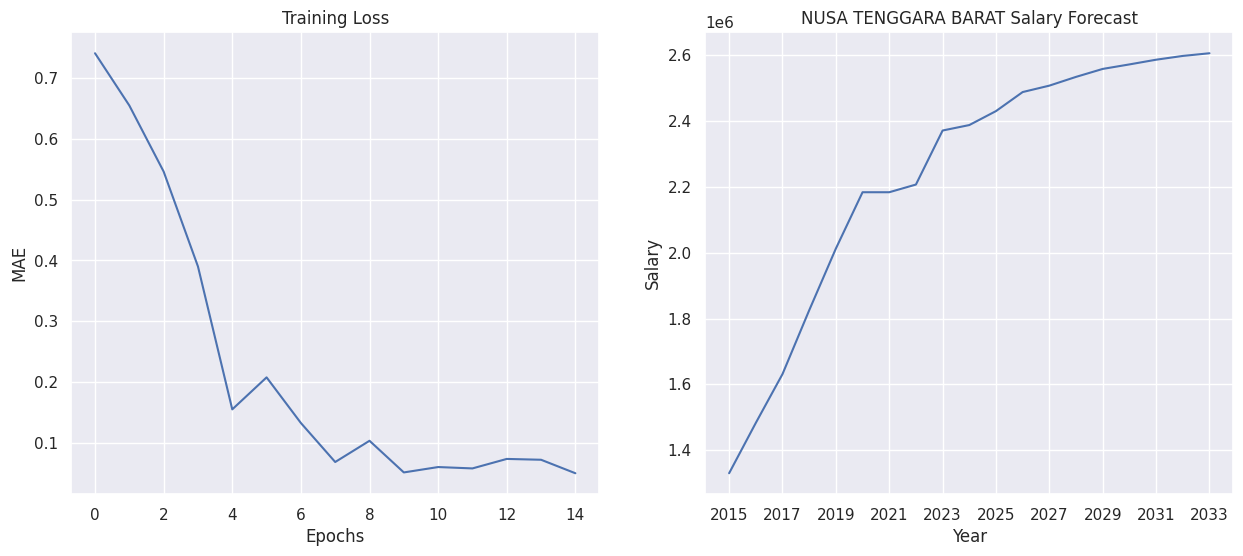

In [ ]:
region = 'NUSA TENGGARA BARAT'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

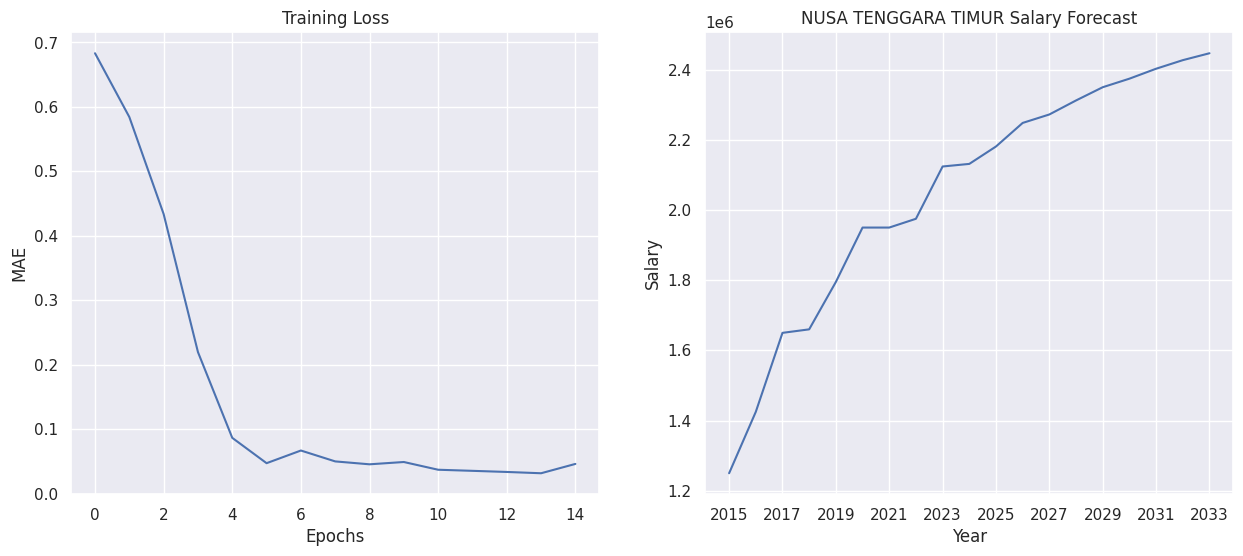

In [ ]:
region = 'NUSA TENGGARA TIMUR'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

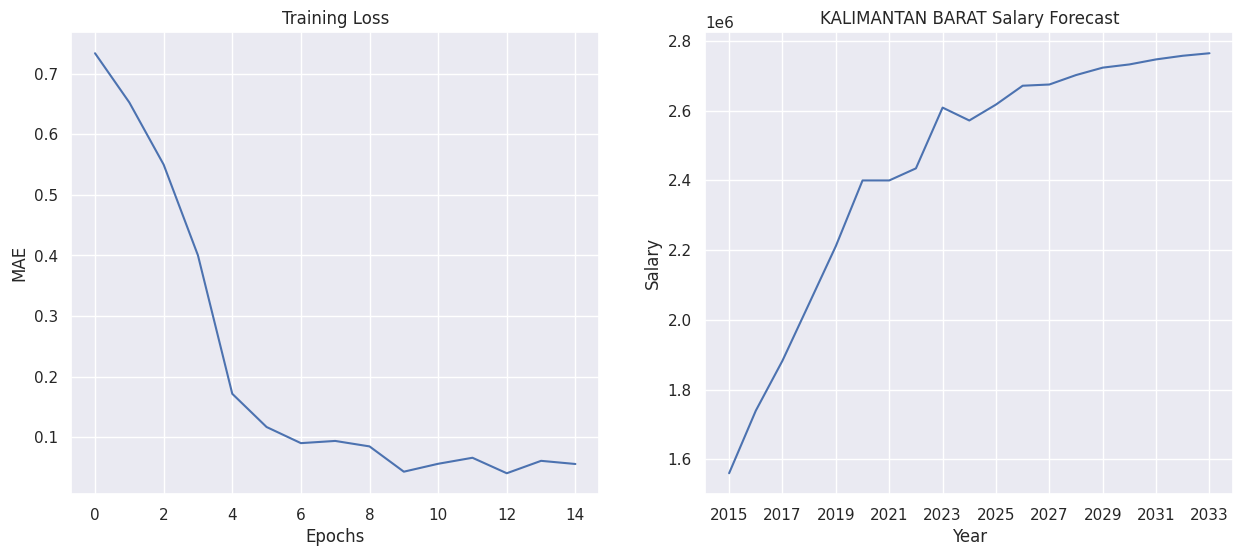

In [ ]:
region = 'KALIMANTAN BARAT'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

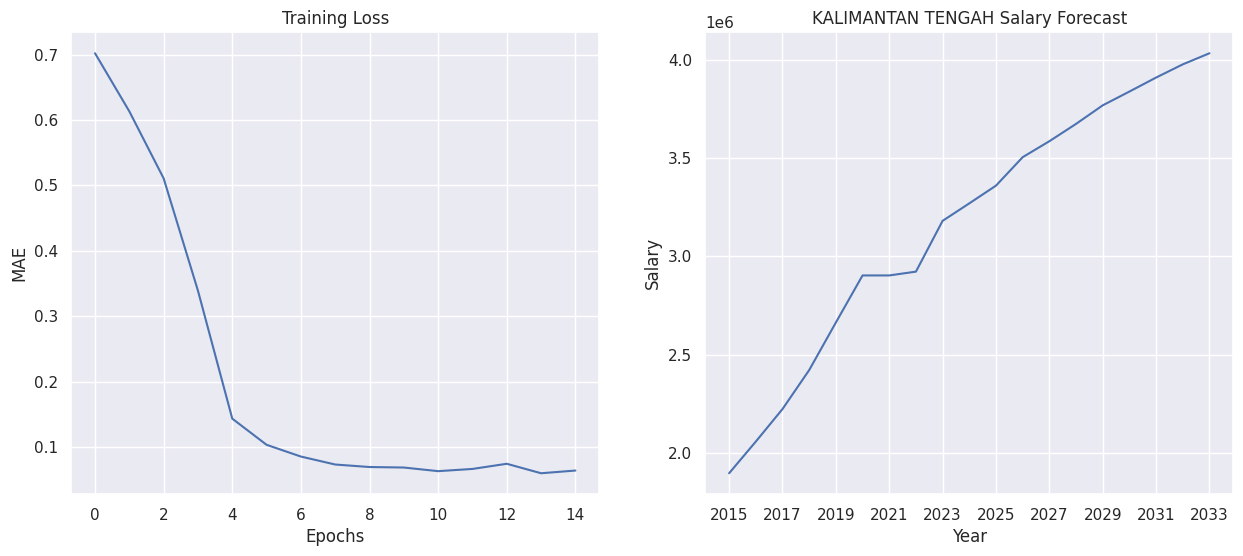

In [ ]:
region = 'KALIMANTAN TENGAH'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

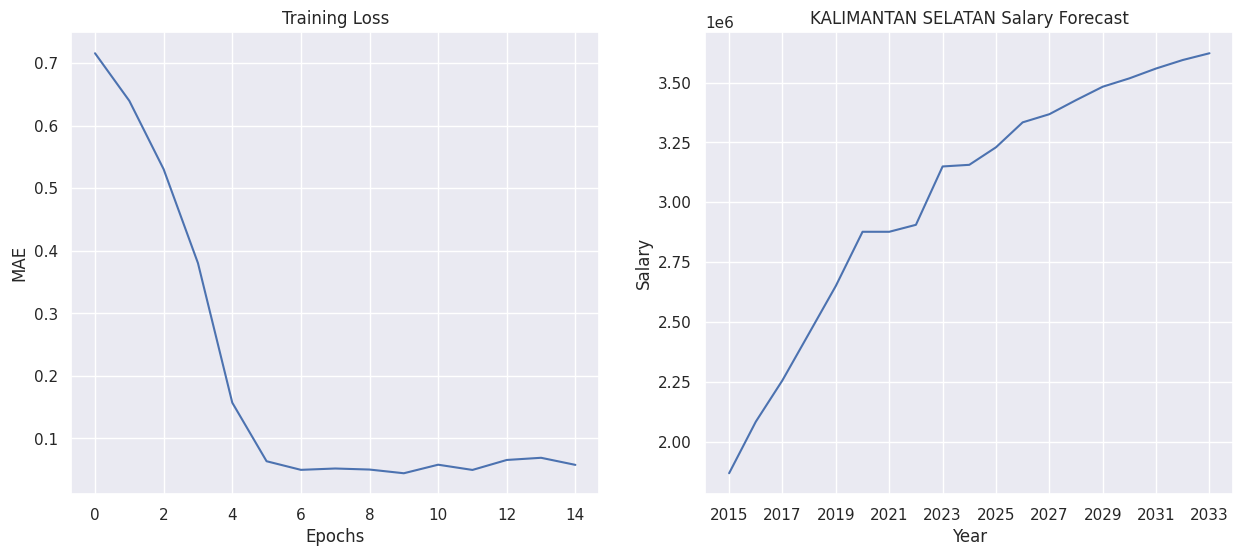

In [ ]:
region = 'KALIMANTAN SELATAN'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

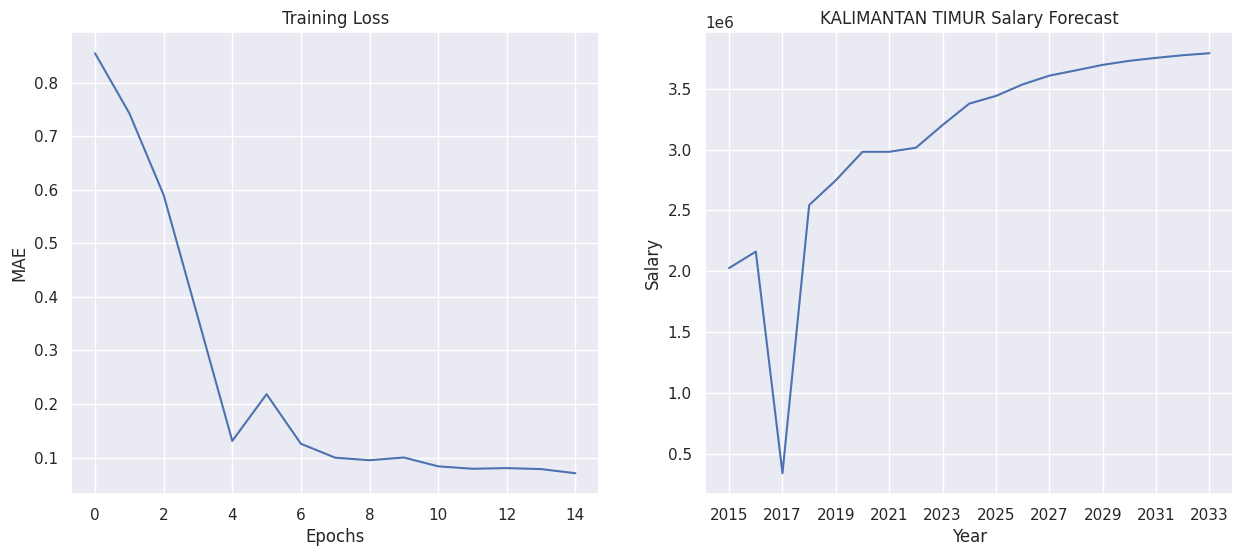

In [ ]:
region = 'KALIMANTAN TIMUR'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

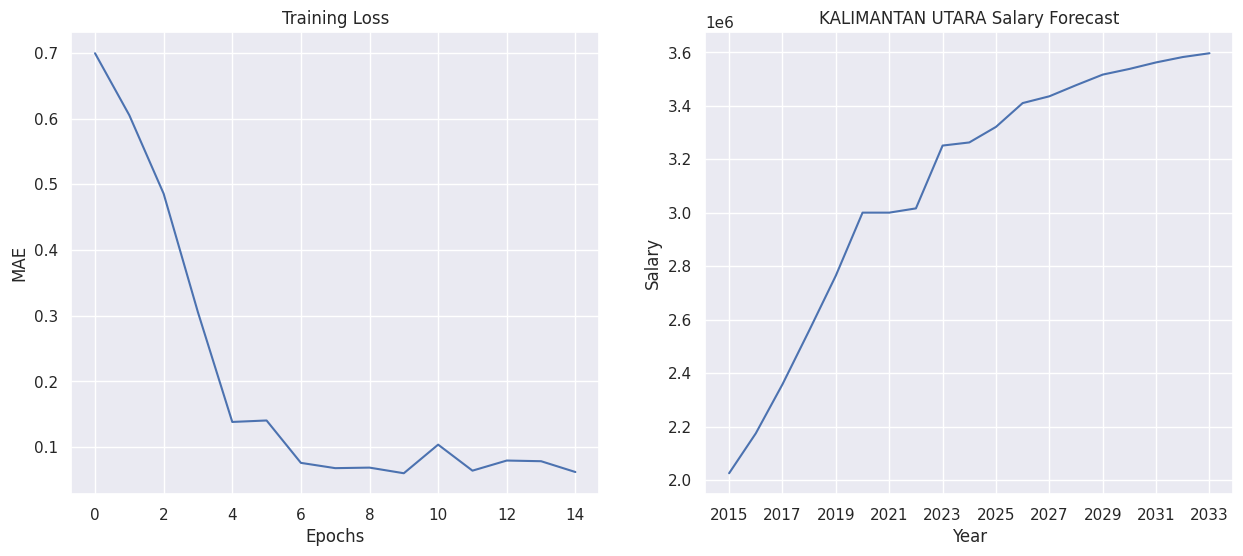

In [ ]:
region = 'KALIMANTAN UTARA'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

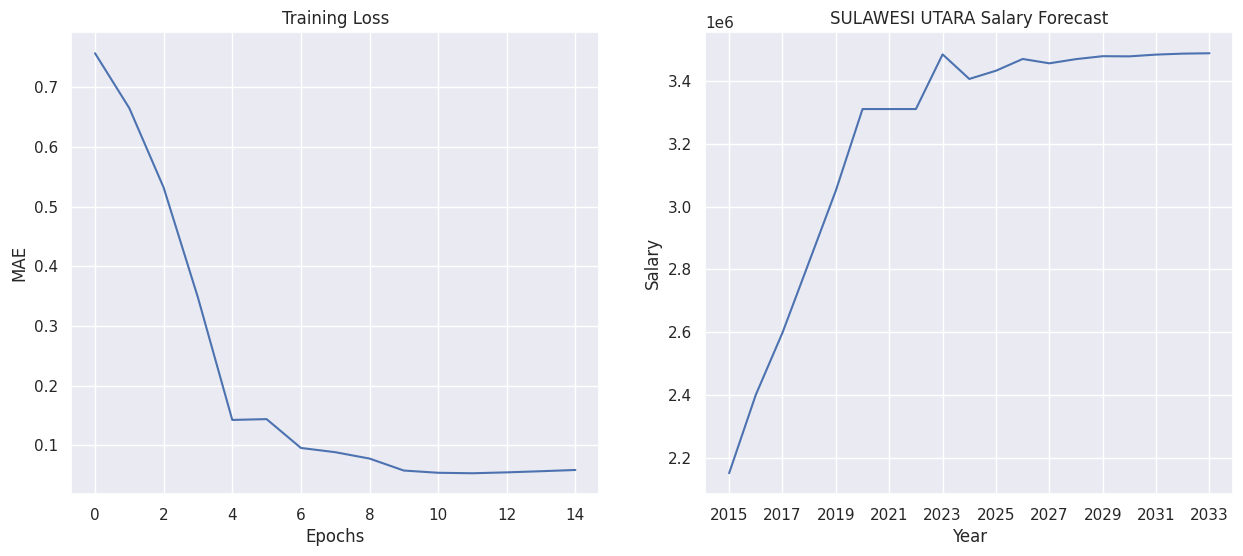

In [ ]:
region = 'SULAWESI UTARA'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

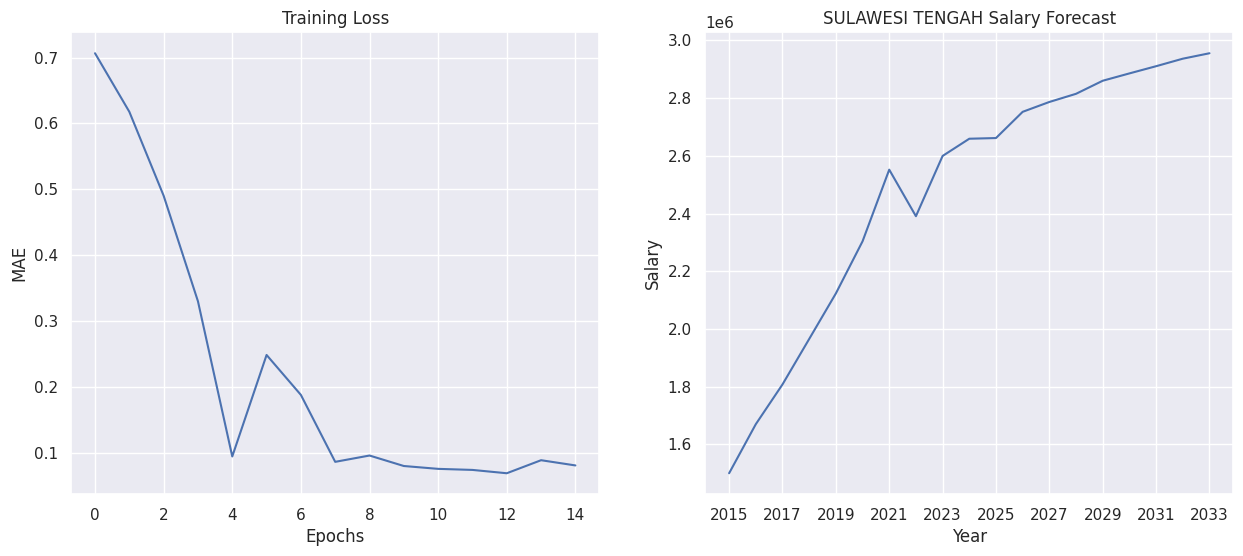

In [ ]:
region = 'SULAWESI TENGAH'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

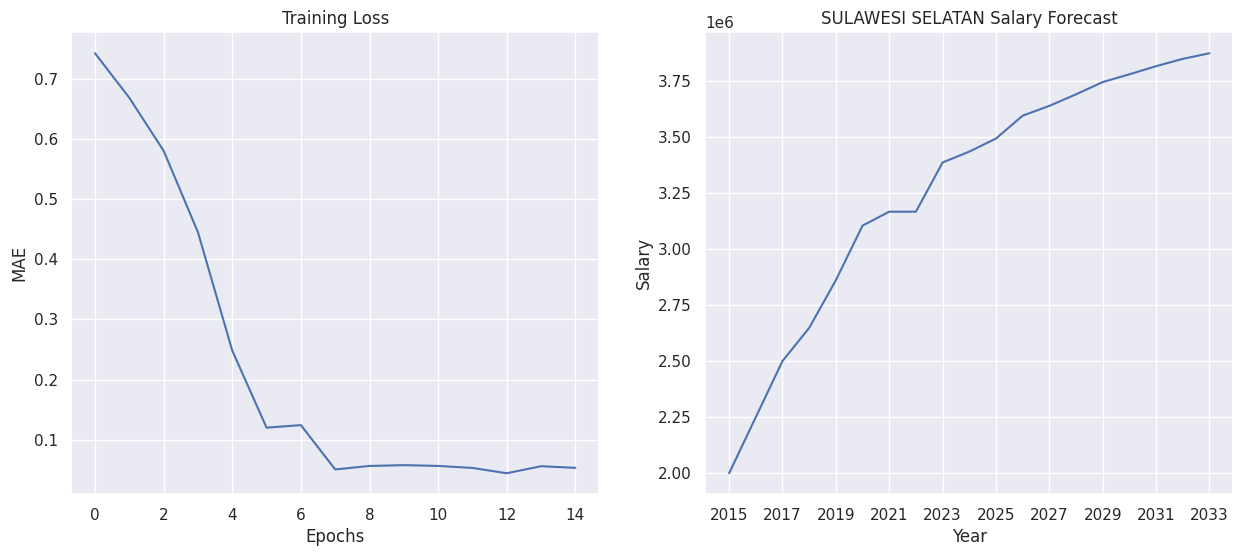

In [ ]:
region = 'SULAWESI SELATAN'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

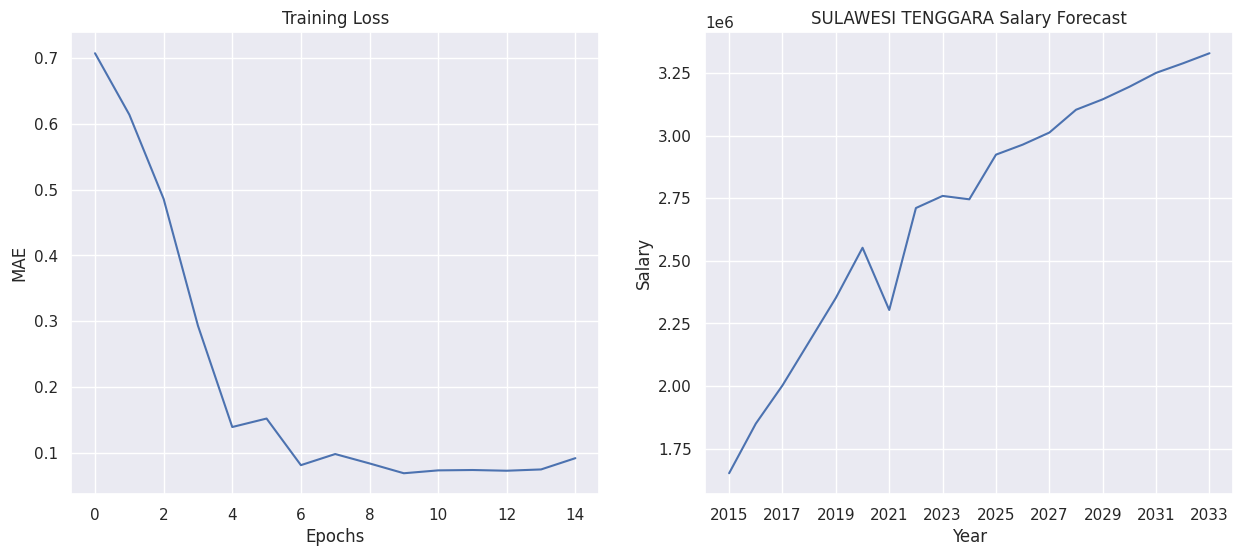

In [ ]:
region = 'SULAWESI TENGGARA'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

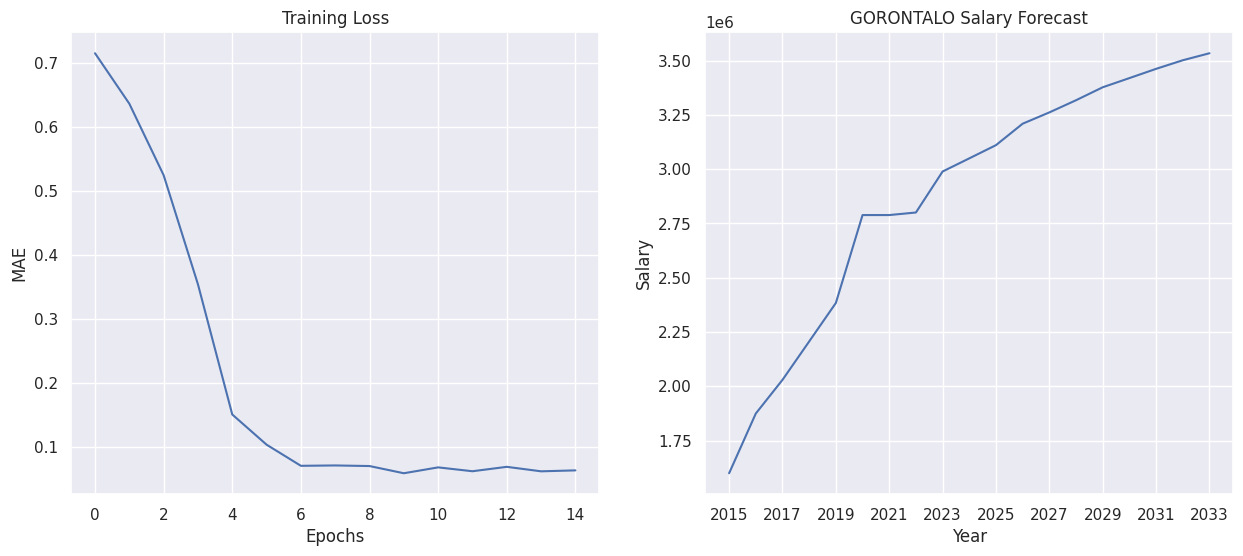

In [ ]:
region = 'GORONTALO'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

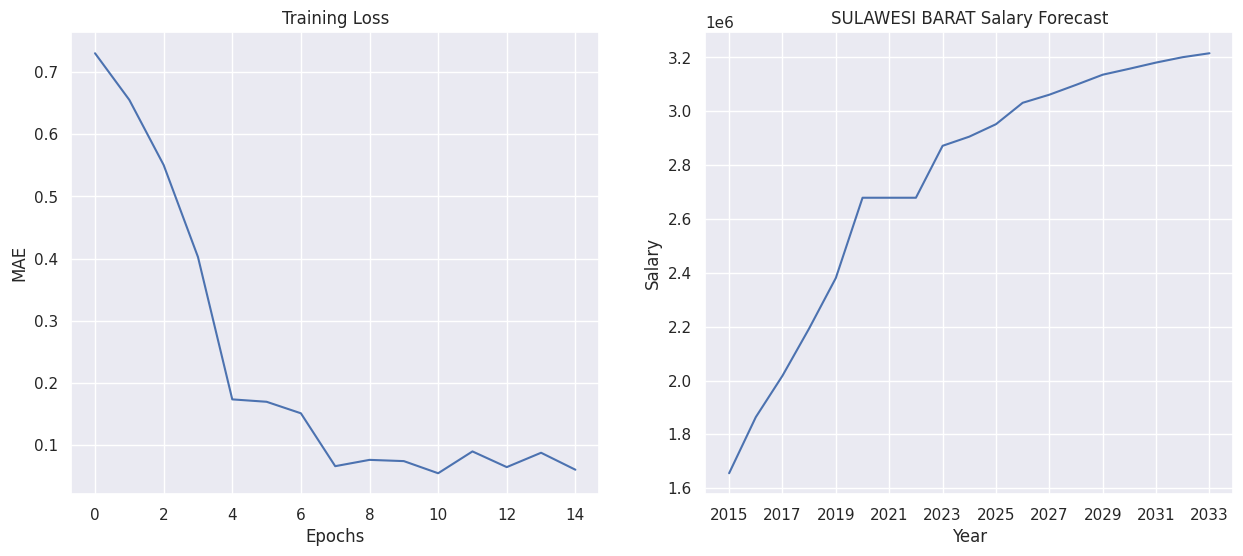

In [ ]:
region = 'SULAWESI BARAT'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

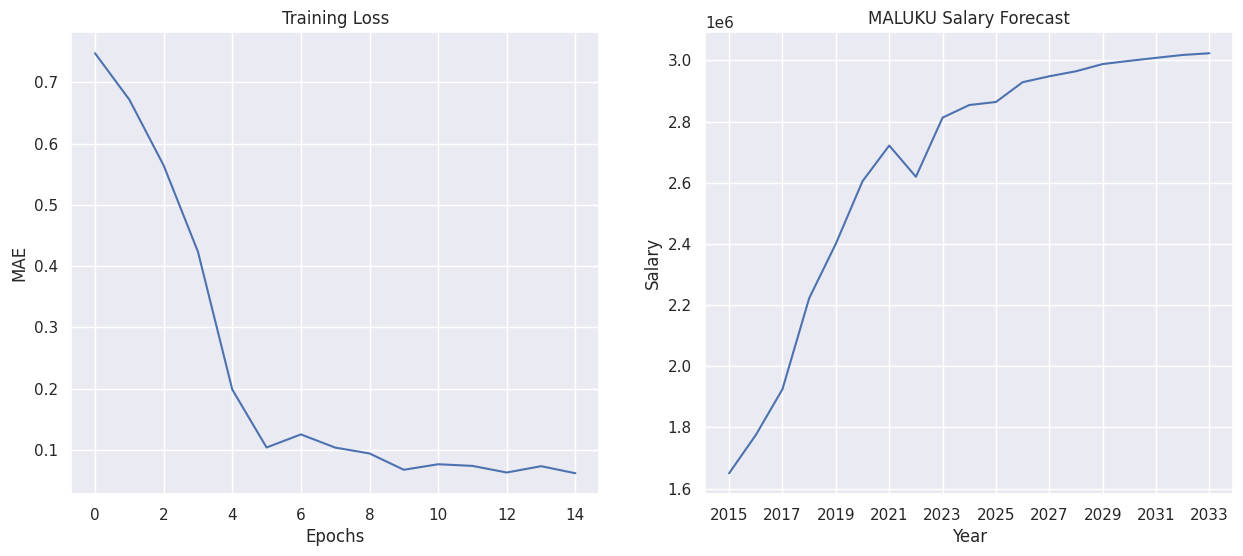

In [ ]:
region = 'MALUKU'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

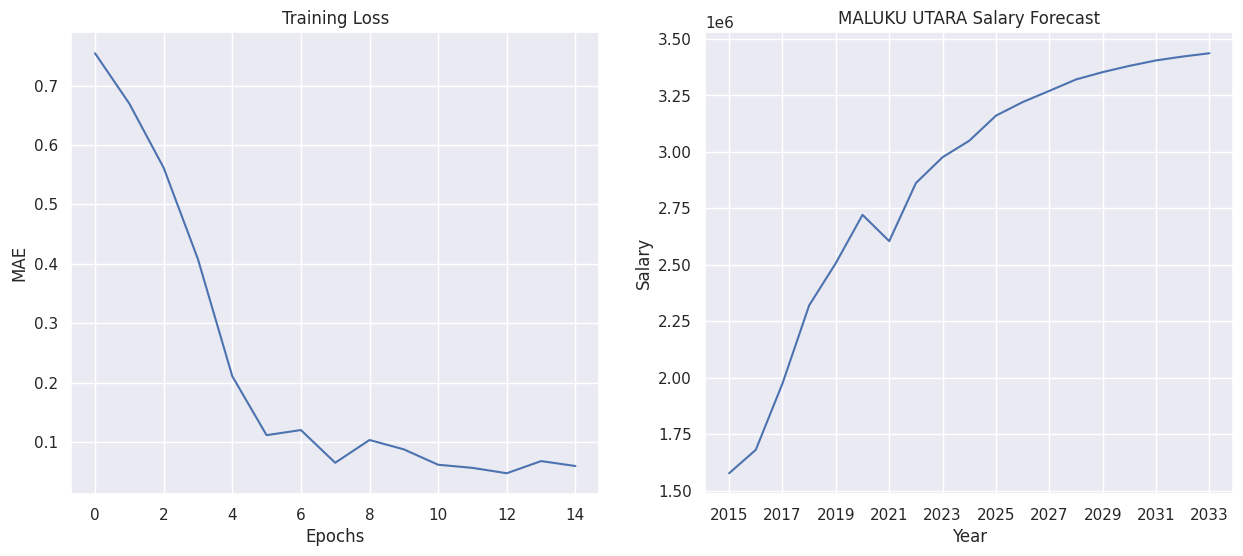

In [ ]:
region = 'MALUKU UTARA'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

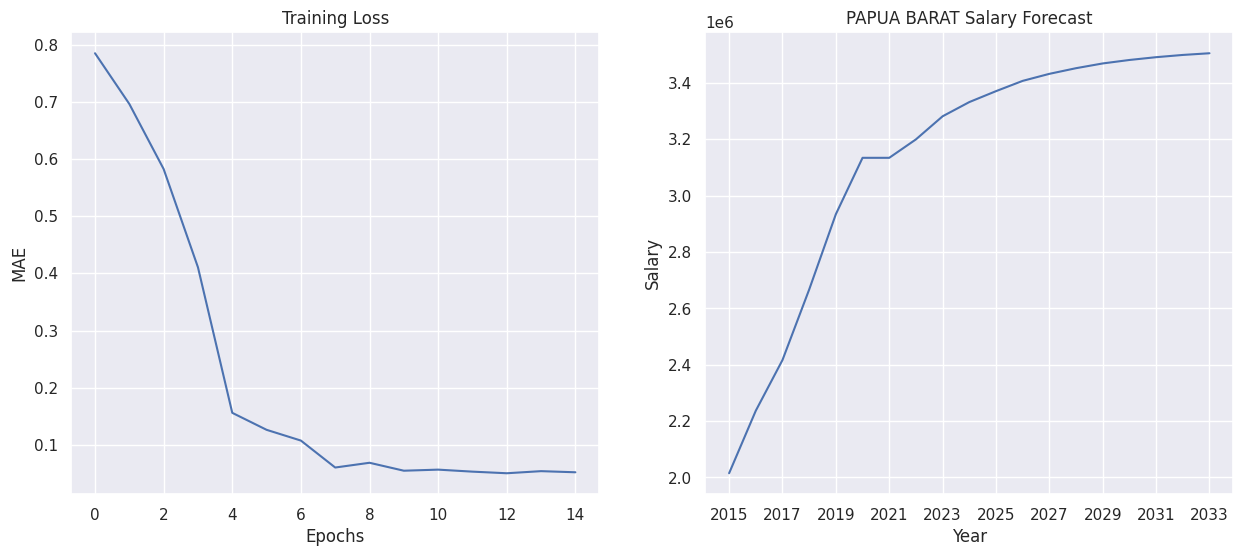

In [ ]:
region = 'PAPUA BARAT'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)

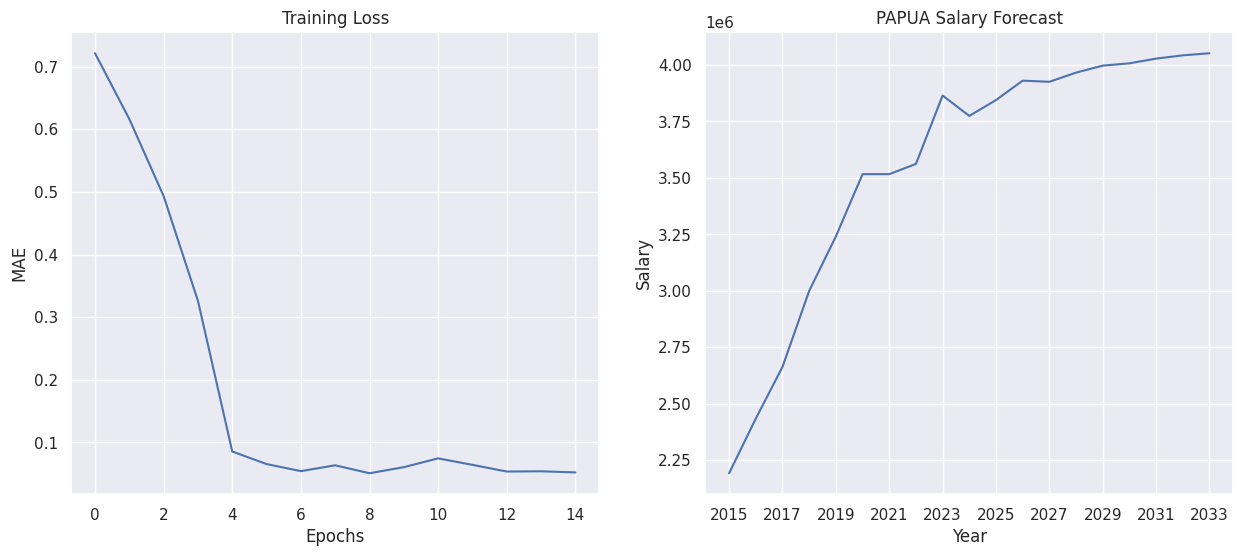

In [ ]:
region = 'PAPUA'

series = salaries_by_region.loc[region]['SALARY']
scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
train_set = windowed_dataset(scaled_series, window_size, batch_size, shuffle_buffer)

models[region] = build_model()
histories[region] = models[region].fit(train_set, epochs=15, verbose=0)

combined_series = forecast(series, scaled_series, window_size, 10, models[region])

plot_results(histories[region], combined_series, region)